In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

pr0xifier_celeba_images_n_captions_path = kagglehub.dataset_download('pr0xifier/celeba-images-n-captions')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

Для первичной работы над проектом мы решили использовать готовый датасет CelebA-HQ из 30,000 изображений лиц знаменитостей, в свою очередь полученный из CelebA датасета размеров в 200,000 изображений. Этот датасет много используется в задачах инверсии и редактировании изображений, которой мы будем заниматься в данном проекте.

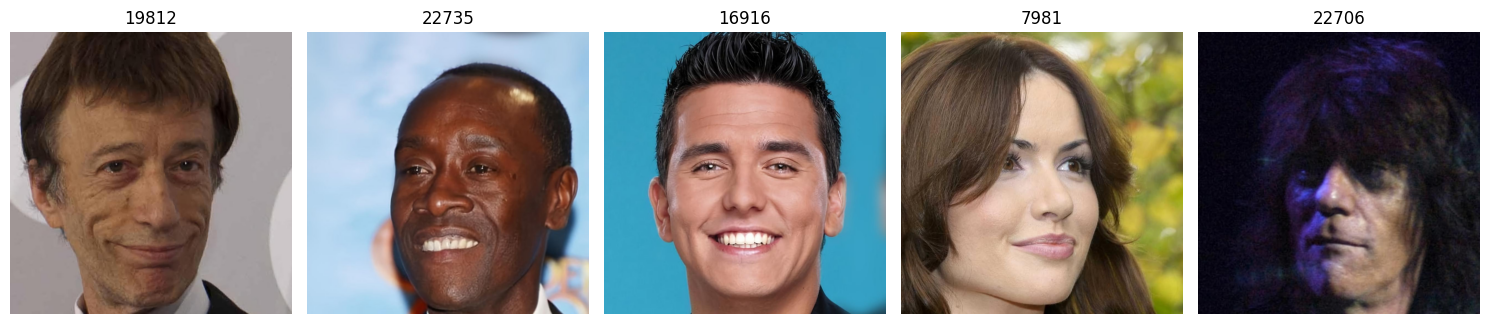

In [ ]:
img_path = '/kaggle/input/celeba-images-n-captions/CelebA-HQ-img/CelebA-HQ-img'

img_files = os.listdir(img_path)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(img_files[:5]):
    img = Image.open(os.path.join(img_path, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Абсолютно все картинки в датасете имеют размер $1024\times1024$. На данном этапе не планируется изменение размеров картинок, т.к. датасет относительно небольшой по сравнению с другими датасетами, что в свою очередь повышает надобность в размерности каритнок для создании точных картинок.

In [ ]:
widths = []
heights = []

for img_file in img_files:
    with Image.open(os.path.join(img_path, img_file)) as img:
        widths.append(img.width)
        heights.append(img.height)

size_df = pd.DataFrame({'Width': widths, 'Height': heights})

print(size_df.describe())

         Width   Height
count  30000.0  30000.0
mean    1024.0   1024.0
std        0.0      0.0
min     1024.0   1024.0
25%     1024.0   1024.0
50%     1024.0   1024.0
75%     1024.0   1024.0
max     1024.0   1024.0


Проверка частоты RGB значений картинок показывает нам, что наиболее глубокий цвет в картинках считается красный, затем зеленый, затем синий. Кожа лица в основном имеет больше значений красных оттенков, поэтому такое неравное распределение имеет смысл в данном контексте.

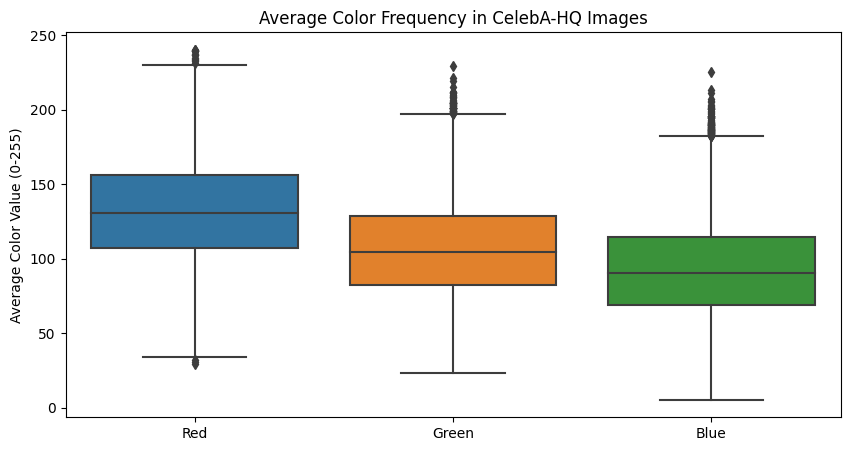

In [ ]:
average_colors = []

for img_file in img_files:
    with Image.open(os.path.join(img_path, img_file)) as img:
        img_array = np.array(img)
        avg_color = img_array.mean(axis=(0, 1))
        average_colors.append(avg_color)

color_df = pd.DataFrame(average_colors, columns=['Red', 'Green', 'Blue'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=color_df)
plt.title('')
plt.ylabel('Среднее значение цвета (0-255)')
plt.xticks(ticks=[0, 1, 2], labels=['Красный', 'Зеленый', 'Синий'])
plt.show()

При проверке среднего изображения в датасете наблюдается больше отчетливости в районе глаз. Для генерации аниме картинок это вполне подойдет, т.к. в основном больше стилистике предпочитается глазам при нарисовке персонажей. В среднем картинка также получилась с большими чертами женского лица, что может вызвать проблему в генерации аниме каритнок для мужских лиц.

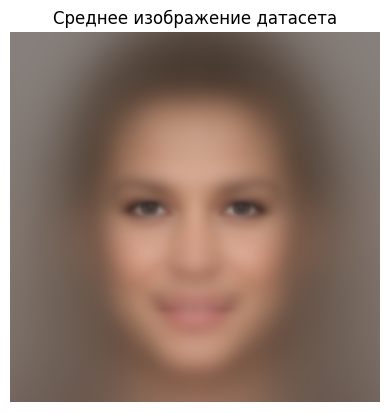

In [ ]:
mean_image = np.zeros((1024, 1024, 3))

for img_file in img_files:
    with Image.open(os.path.join(img_path, img_file)) as img:
        mean_image += np.array(img) / len(img_files)

plt.imshow(mean_image.astype(np.uint8))
plt.title('Среднее изображение датасета')
plt.axis('off')
plt.show()